# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

salaries_file = './ds_salaries.csv'
df = pd.read_csv(salaries_file)

# Examining the Relationship between Remote Ratio and Salary in USD

<AxesSubplot: >

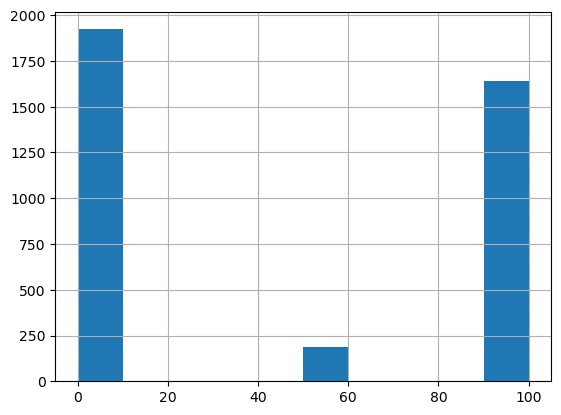

In [2]:
df.remote_ratio.hist()

<AxesSubplot: >

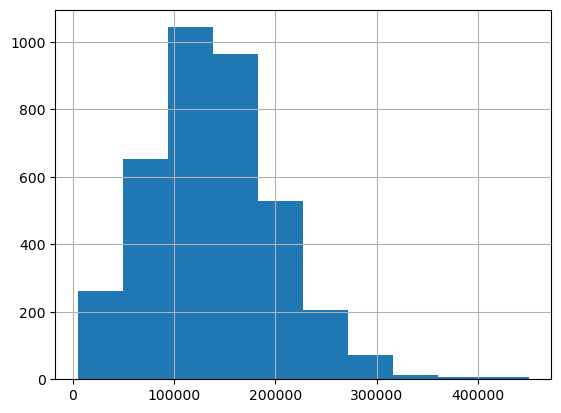

In [3]:
df.salary_in_usd.hist()

In [4]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020.0,MI,FT,Research Scientist,450000.0,USD,450000.0,US,0.0,US,M
1,2022.0,MI,FT,Data Analyst,350000.0,GBP,430967.0,GB,0.0,GB,M
2,2023.0,SE,FT,AI Scientist,1500000.0,ILS,423834.0,IL,0.0,IL,L
3,2021.0,MI,FT,Applied Machine Learning Scientist,423000.0,USD,423000.0,US,50.0,US,L
4,2021.0,EX,CT,Principal Data Scientist,416000.0,USD,416000.0,US,100.0,US,S
...,...,...,...,...,...,...,...,...,...,...,...
3752,2021.0,MI,PT,3D Computer Vision Researcher,400000.0,INR,5409.0,IN,50.0,IN,M
3753,2021.0,EN,FT,Power BI Developer,400000.0,INR,5409.0,IN,50.0,IN,L
3754,2022.0,MI,FT,NLP Engineer,120000.0,CZK,5132.0,CZ,100.0,CZ,M
3755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.sort_values(['remote_ratio', 'salary_in_usd'], inplace=True)
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
indexed_df = df.set_index(['remote_ratio'])
remote_salary_df = indexed_df[['salary_in_usd']]

In [7]:
rr0 = indexed_df.loc[0]
rr50 = indexed_df.loc[50]
rr100 = indexed_df.loc[100]

In [8]:
rr0.reset_index(inplace=True)
rr50.reset_index(inplace=True)
rr100.reset_index(inplace=True)

<AxesSubplot: title={'center': '100 Remote_Ratio'}>

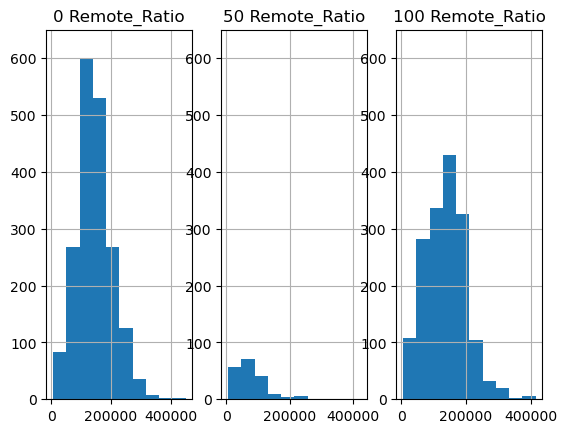

In [9]:
plt.subplot(131)
plt.ylim(top=650)
plt.title('0 Remote_Ratio')

rr0['salary_in_usd'].hist()

plt.subplot(132)
plt.title('50 Remote_Ratio')
plt.ylim(top=650)

rr50['salary_in_usd'].hist()

plt.subplot(133)
plt.ylim(top=650)
plt.title('100 Remote_Ratio')

rr100['salary_in_usd'].hist()

In [10]:
rr0['salary_in_usd'].describe(), rr50['salary_in_usd'].describe(), rr100['salary_in_usd'].describe()

(count      1923.000000
 mean     144316.202288
 std       59799.970864
 min        5882.000000
 25%      105200.000000
 50%      139600.000000
 75%      179820.000000
 max      450000.000000
 Name: salary_in_usd, dtype: float64,
 count       189.000000
 mean      78400.687831
 std       61326.133522
 min        5409.000000
 25%       40570.000000
 50%       63312.000000
 75%      100000.000000
 max      423000.000000
 Name: salary_in_usd, dtype: float64,
 count      1643.000000
 mean     136481.452830
 std       63373.507699
 min        5132.000000
 25%       90000.000000
 50%      135000.000000
 75%      180000.000000
 max      416000.000000
 Name: salary_in_usd, dtype: float64)

let's use Panda's GroupBy

In [17]:
remote_grps = df.groupby('remote_ratio')
remote_grps['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0.0,1923.0,144316.202288,59799.970864,5882.0,105200.0,139600.0,179820.0,450000.0
50.0,189.0,78400.687831,61326.133522,5409.0,40570.0,63312.0,100000.0,423000.0
100.0,1643.0,136481.452830,63373.507699,5132.0,90000.0,135000.0,180000.0,416000.0


That's alot easier than my diy method

# Examining How Salaries Change Over The Years

In [12]:
wkyrs = df
wkyrs.dropna(inplace=True)
# wkyrs.sort_values('work_year')
wkyrs.groupby('work_year')
yrgrps = wkyrs.groupby('work_year')
yrgrps['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020.0,76.0,92302.631579,82370.048002,5707.0,42147.75,73065.0,114285.25,450000.0
2021.0,230.0,94087.208696,68600.465120,5409.0,46650.00,80000.0,129305.25,423000.0
2022.0,1664.0,133338.620793,58947.155520,5132.0,94545.00,131300.0,172050.00,430967.0
2023.0,1785.0,149045.541176,61307.711442,7000.0,107000.00,143860.0,184000.00,423834.0


In [13]:
yrgrps.mean()

/tmp/ipykernel_400/3401954873.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yrgrps.mean()


,salary,salary_in_usd,remote_ratio
work_year,,,
2020.0,386352.750000,92302.631579,65.131579
2021.0,544163.252174,94087.208696,68.695652
2022.0,165421.016827,133338.620793,55.408654
2023.0,160381.480672,149045.541176,34.061625


## Look Only At USA

In [14]:
employee_res_grps = df['salary_in_usd'].groupby(df['employee_residence'])
# employee_res_grps = df.groupby('employee_residence')
# employee_res_grps.loc['US']
employee_res_grps.groups

{'AE': [2395, 3288, 2303], 'AM': [3487], 'AR': [3725, 3713, 3633, 3508, 3476, 3374], 'AS': [3675, 3537], 'AT': [3332, 2868, 3470, 3160, 2923, 3356], 'AU': [3007, 3553, 3540, 3120, 3008, 3569, 3433, 3239, 3004, 1912, 1410], 'BA': [2221], 'BE': [3445, 3012, 3479, 2994, 2929], 'BG': [3063], 'BO': [3741, 3123, 3124], 'BR': [3714, 3686, 3745, 3740, 3735, 3722, 3684, 3659, 3558, 3507, 3509, 3428, 3091, 3092, 3096, 3002, 2744, 1190], 'CA': [3563, 3446, 3276, 3253, 3195, 3141, 2970, 2917, 2699, 2491, 2500, 2419, 2286, 1930, 1764, 1693, 1637, 1553, 925, 918, 706, 708, 375, 337, 192, 128, 129, 92, 3728, 3235, 2793, 2765, 2584, 2324, 2131, 2130, 2104, 1181, 656, 532, 3456, 3449, 3345, 3346, 3300, 3251, 3198, 3170, 3156, 3114, 3110, 3111, 2936, 2873, 2840, 2831, 2677, 2745, 2634, 2501, 2396, 2363, 2340, 2276, 1961, 1974, 1975, 1839, 1802, 1574, 1372, 1285, 1207, 1095, 935, 964, 822, 776, 733, 731, 655, 304, 191, 124, 104], 'CF': [3550, 3417], 'CH': [2216, 2214, 3397, 2617], 'CL': [3567, 2614], 'CN

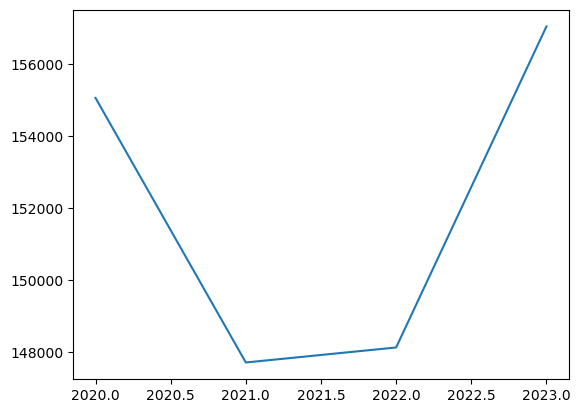

In [15]:
wkyr_usa = df.set_index('employee_residence').loc["US"][[ 'salary_in_usd', 'work_year' ]].groupby('work_year')
plt.plot((2020,2021,2022,2023) , wkyr_usa.describe()['salary_in_usd']['mean'] )

A downward trend during COVID, but a higher upward trend after 2022

## Sub-analyzing at salaries over time for each remote_ratio

In [18]:
remote_grps.describe()

work_year                                                         \
                 count         mean       std     min     25%     50%     75%   
remote_ratio                                                                    
0.0             1923.0  2022.569943  0.574946  2020.0  2022.0  2023.0  2023.0   
50.0             189.0  2021.534392  0.890334  2020.0  2021.0  2021.0  2022.0   
100.0           1643.0  2022.240414  0.686585  2020.0  2022.0  2022.0  2023.0   

                      salary                 ...                        \
                 max   count           mean  ...       75%         max   
remote_ratio                                 ...                         
0.0           2023.0  1923.0  154386.659906  ...  180000.0   4900000.0   
50.0          2023.0   189.0  557067.502646  ...  157000.0  11000000.0   
100.0         2023.0  1643.0  191047.210590  ...  183500.0  30400000.0   

             salary_in_usd                                                 \
                     count           mean           std     min       25%   
remote_ratio                                                                
0.0                 1923.0  144316.202288  59799.970864  5882.0  105200.0   
50.0                 189.0   78400.687831  61326.133522  5409.0   40570.0   
100.0               1643.0  136481.452830  63373.507699  5132.0   90000.0   

                                            
                   50%       75%       max  
remote_ratio                                
0.0           139600.0  179820.0  450000.0  
50.0           63312.0  100000.0  423000.0  
100.0         135000.0  180000.0  416000.0  

[3 rows x 24 columns]

## Examining Salary Trends In Careers

In [25]:
job_workyear_df = df.set_index(['job_title', 'work_year']).sort_index()
job_workyear_grps = job_workyear_df.groupby('job_title')
print('Salaries in Careers')
job_workyear_grps['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
3D Computer Vision Researcher,4.0,21352.250000,20046.470685,5409.0,8852.25,15000.0,27500.0,50000.0
AI Developer,11.0,136666.090909,95973.553918,6304.0,69702.50,108000.0,207309.0,300000.0
AI Programmer,2.0,55000.000000,21213.203436,40000.0,47500.00,55000.0,62500.0,70000.0
AI Scientist,16.0,110120.875000,111733.541359,12000.0,31140.00,52500.0,200000.0,423834.0
Analytics Engineer,103.0,152368.631068,53838.467623,7500.0,116775.00,143860.0,185200.0,289800.0
...,...,...,...,...,...,...,...,...
Research Engineer,37.0,163108.378378,55055.424934,60000.0,120000.00,155000.0,200000.0,293000.0
Research Scientist,82.0,161214.195122,74944.431627,23000.0,104579.00,150000.0,200000.0,450000.0
Software Data Engineer,2.0,62510.000000,17691.811665,50000.0,56255.00,62510.0,68765.0,75020.0


In [31]:
print('Remote ratios in Careers')
job_workyear_grps['remote_ratio'].describe()

Remote ratios in Careers


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
3D Computer Vision Researcher,4.0,50.000000,40.824829,0.0,37.5,50.0,62.5,100.0
AI Developer,11.0,31.818182,40.451992,0.0,0.0,0.0,50.0,100.0
AI Programmer,2.0,50.000000,70.710678,0.0,25.0,50.0,75.0,100.0
AI Scientist,16.0,71.875000,40.697051,0.0,50.0,100.0,100.0,100.0
Analytics Engineer,103.0,54.368932,49.560221,0.0,0.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...
Research Engineer,37.0,18.918919,39.706128,0.0,0.0,0.0,0.0,100.0
Research Scientist,82.0,27.439024,40.939913,0.0,0.0,0.0,50.0,100.0
Software Data Engineer,2.0,75.000000,35.355339,50.0,62.5,75.0,87.5,100.0
